In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def show_matrix(mat, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(mat, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
    plt.title(title)
    plt.show()
    print()

# FFT-Based Convolution

In [5]:
def show_matrix(mat, title):
    print(f"{title}:\n{np.round(mat, 3)}\n")

# Input and filter
x = np.array([
    [1, 2, 3, 4],
    [-1, -2, -3, -4],
    [1, -2, 3, -4],
    [0, 0, 0, -1]
], dtype=float)

f = np.array([
    [8, 0, 0],
    [0, 8, 0],
    [0, 0, 8]
], dtype=float)

show_matrix(x, "Input x")
show_matrix(f, "Filter f")

# 1. Pad the filter to match input size (4x4)
f_padded = np.pad(f, ((0,1), (0,1)), mode='constant')
show_matrix(f_padded, "Padded filter")

# 2. Compute 2D FFT of input and padded filter
X_fft = np.fft.fft2(x)
F_fft = np.fft.fft2(f_padded)

show_matrix(X_fft.real, "X_fft (real)")
show_matrix(X_fft.imag, "X_fft (imag)")
show_matrix(F_fft.real, "F_fft (real)")
show_matrix(F_fft.imag, "F_fft (imag)")

# 3. Element-wise multiplication in frequency domain
E_fft = X_fft * F_fft
show_matrix(E_fft.real, "E_fft (real)")
show_matrix(E_fft.imag, "E_fft (imag)")

# 4. Inverse FFT
conv_full = np.fft.ifft2(E_fft).real
show_matrix(conv_full, "Full convolution (before cropping)")

# 5. Crop to valid region (2x2)
out_fft = conv_full[2:4, 2:4]
show_matrix(out_fft, "FFT-based convolution result")

# Compare with direct spatial convolution
def spatial_conv2d(x, f):
    output_shape = (x.shape[0] - f.shape[0] + 1, x.shape[1] - f.shape[1] + 1)
    out = np.zeros(output_shape)
    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            out[i,j] = np.sum(x[i:i+f.shape[0], j:j+f.shape[1]] * f)
    return out

out_spatial = spatial_conv2d(x, f)
show_matrix(out_spatial, "Spatial convolution result")

# Verify results match
print("Results match:", np.allclose(out_fft, out_spatial, atol=1e-10))

Input x:
[[ 1.  2.  3.  4.]
 [-1. -2. -3. -4.]
 [ 1. -2.  3. -4.]
 [ 0.  0.  0. -1.]]

Filter f:
[[8. 0. 0.]
 [0. 8. 0.]
 [0. 0. 8.]]

Padded filter:
[[8. 0. 0. 0.]
 [0. 8. 0. 0.]
 [0. 0. 8. 0.]
 [0. 0. 0. 0.]]

X_fft (real):
[[ -3.  -2.  11.  -2.]
 [ 12.  -1. -12.   1.]
 [ 19.  -6.   5.  -6.]
 [ 12.   1. -12.  -1.]]

X_fft (imag):
[[ 0. -3.  0.  3.]
 [ 9.  2. -1. -6.]
 [ 0.  3.  0. -3.]
 [-9.  6.  1. -2.]]

F_fft (real):
[[24.  0.  8.  0.]
 [ 0.  8.  0. 24.]
 [ 8.  0. 24.  0.]
 [ 0. 24.  0.  8.]]

F_fft (imag):
[[ 0. -8.  0.  8.]
 [-8.  0.  8.  0.]
 [ 0.  8.  0. -8.]
 [ 8.  0. -8.  0.]]

E_fft (real):
[[-72. -24.  88. -24.]
 [ 72.  -8.   8.  24.]
 [152. -24. 120. -24.]
 [ 72.  24.   8.  -8.]]

E_fft (imag):
[[   0.   16.    0.  -16.]
 [ -96.   16.  -96. -144.]
 [   0.  -48.    0.   48.]
 [  96.  144.   96.  -16.]]

Full convolution (before cropping):
[[ 24. -16.  32.  16.]
 [ 24. -16.  -8.  -8.]
 [  0.   8.  16. -40.]
 [-56. -24. -24.   0.]]

FFT-based convolution result:
[[ 16. -40.]

In [19]:
import numpy as np

# Your input data
E_fft_real = np.array([
    [-72., -24., 88., -24.],
    [72., -8., 8., 24.],
    [152., -24., 120., -24.],
    [72., 24., 8., -8.]
])

E_fft_imag = np.array([
    [0., 16., 0., -16.],
    [-96., 16., -96., -144.],
    [0., -48., 0., 48.],
    [96., 144., 96., -16.]
])

# Combine real and imaginary parts
E_fft = E_fft_real + 1j * E_fft_imag

# Define the size of the transform
N = 4

# Pre-compute the inverse DFT matrix
def create_inverse_dft_matrix(N):
    W_inv = np.zeros((N, N), dtype=complex)
    for k in range(N):
        for l in range(N):
            W_inv[k, l] = (1.0/N) * np.exp(2j * np.pi * k * l / N)
    return W_inv

# Create the inverse DFT matrix
W_inv = create_inverse_dft_matrix(N)

# Print the inverse DFT matrix for verification
print("Inverse DFT Matrix (W_inv):")
print(np.around(W_inv, 3))

# Step 1: Apply IFFT to rows (E_fft * W_inv)
temp = np.zeros((N, N), dtype=complex)
for i in range(N):
    for j in range(N):
        for k in range(N):
            temp[i, j] += E_fft[i, k] * W_inv[k, j]

print(temp.real, "Intermediate Result after Row IFFT (real)")
print(temp.imag, "Intermediate Result after Row IFFT (img)")
print(temp, "Intermediate Result after Row IFFT")

# Step 2: Apply IFFT to columns (W_inv * temp)
result = np.zeros((N, N), dtype=complex)
for i in range(N):
    for j in range(N):
        for k in range(N):
            result[i, j] += W_inv[i, k] * temp[k, j]

print(result.real, "Result after Row IFFT (real)")
print(result.imag, "Result after Row IFFT (img)")
# Extract the real part of the result
conv_full = np.real(result)

print("\nIFFT Result (Real Part):")
print(conv_full)

# Verify with numpy's ifft2
numpy_result = np.real(np.fft.ifft2(E_fft))
print("\nNumpy IFFT2 Result for Verification:")
print(numpy_result)

# Check if our implementation matches numpy's
print("\nDo the results match?", np.allclose(conv_full, numpy_result))

Inverse DFT Matrix (W_inv):
[[ 0.25+0.j    0.25+0.j    0.25+0.j    0.25+0.j  ]
 [ 0.25+0.j    0.  +0.25j -0.25+0.j   -0.  -0.25j]
 [ 0.25+0.j   -0.25+0.j    0.25-0.j   -0.25+0.j  ]
 [ 0.25+0.j   -0.  -0.25j -0.25+0.j    0.  +0.25j]]
[[ -8. -48.  16. -32.]
 [ 24. -24.  16.  56.]
 [ 56.  32.  80. -16.]
 [ 24. -24.  16.  56.]] Intermediate Result after Row IFFT (real)
[[ 0.00000000e+00  3.55271368e-15 -8.43769499e-15  5.32907052e-15]
 [-8.00000000e+01 -8.00000000e+00 -1.60000000e+01  8.00000000e+00]
 [ 0.00000000e+00  8.88178420e-16 -8.88178420e-15  1.86517468e-14]
 [ 8.00000000e+01  8.00000000e+00  1.60000000e+01 -8.00000000e+00]] Intermediate Result after Row IFFT (img)
[[ -8.+0.00000000e+00j -48.+3.55271368e-15j  16.-8.43769499e-15j
  -32.+5.32907052e-15j]
 [ 24.-8.00000000e+01j -24.-8.00000000e+00j  16.-1.60000000e+01j
   56.+8.00000000e+00j]
 [ 56.+0.00000000e+00j  32.+8.88178420e-16j  80.-8.88178420e-15j
  -16.+1.86517468e-14j]
 [ 24.+8.00000000e+01j -24.+8.00000000e+00j  16.+1.6000

# How to do Transform and Inverse Transform

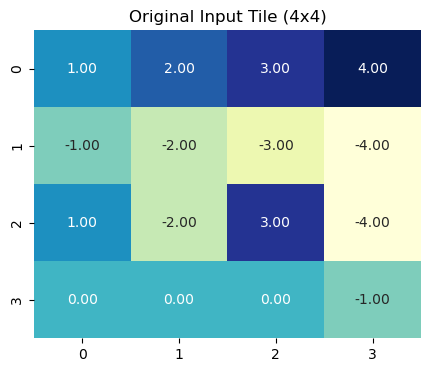

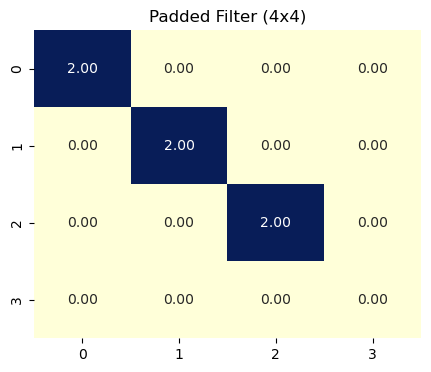



Computing DC component (k=0) for first row:
Row data: [1. 2. 3. 4.]
Cosine terms (k=0): [1, 1, 1, 1]
Real part = sum(row * cos) = 10.0
Sine terms (k=0): [0, 0, 0, 0]
Imag part = sum(row * sin) = 0.0

Computing DC component (k=0) for first row:
Row data: [2. 0. 0. 0.]
Cosine terms (k=0): [1, 1, 1, 1]
Real part = sum(row * cos) = 2.0
Sine terms (k=0): [0, 0, 0, 0]
Imag part = sum(row * sin) = 0.0


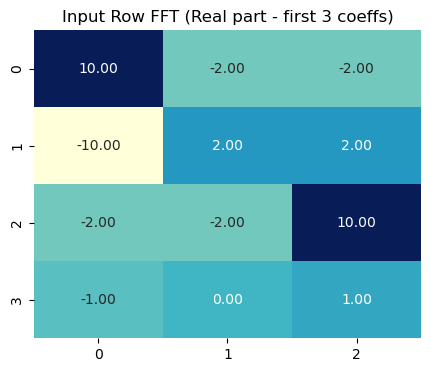

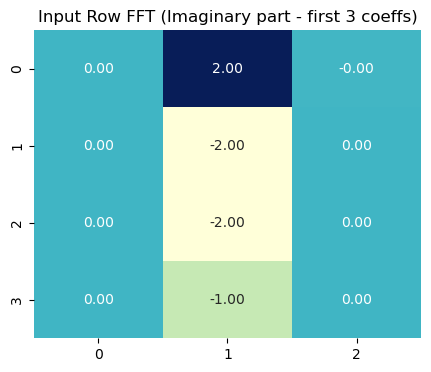

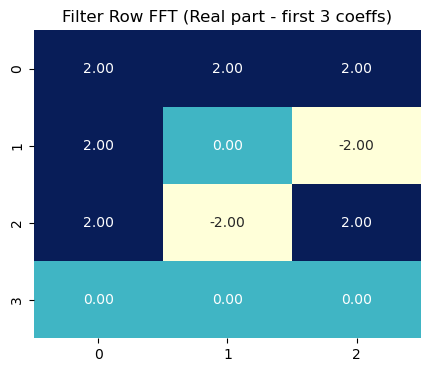

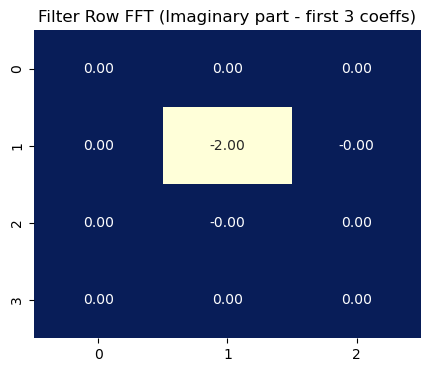



Computing first column's DC component (l=0):
Column real parts: [ 10. -10.  -2.  -1.]
Column imag parts: [0. 0. 0. 0.]
Cosine terms (l=0): [1, 1, 1, 1]
Sine terms (l=0): [0, 0, 0, 0]
Real part = sum(cos*real - sin*imag) = -3.0
Imag part = sum(cos*imag + sin*real) = 0.0

Computing first column's DC component (l=0):
Column real parts: [2. 2. 2. 0.]
Column imag parts: [0. 0. 0. 0.]
Cosine terms (l=0): [1, 1, 1, 1]
Sine terms (l=0): [0, 0, 0, 0]
Real part = sum(cos*real - sin*imag) = 6.0
Imag part = sum(cos*imag + sin*real) = 0.0


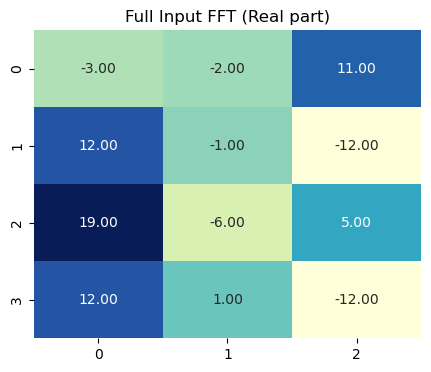

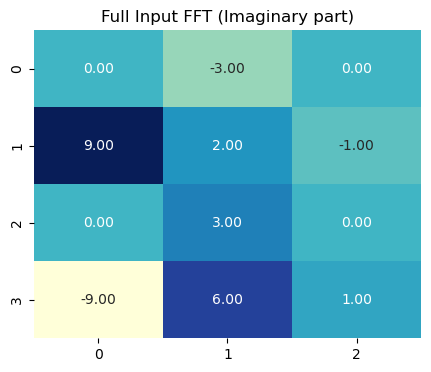

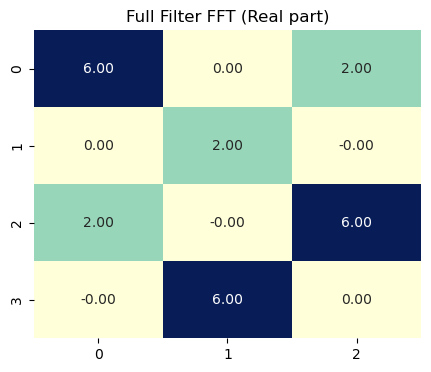

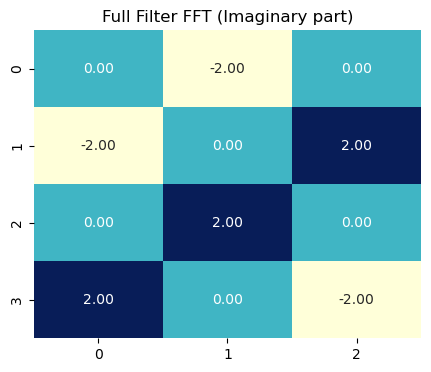

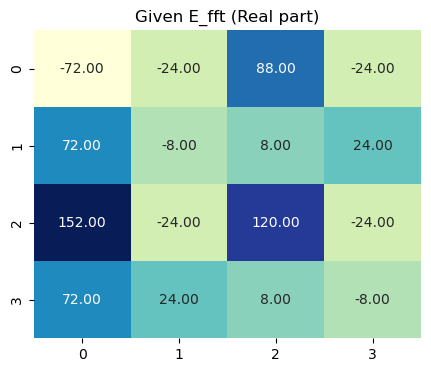

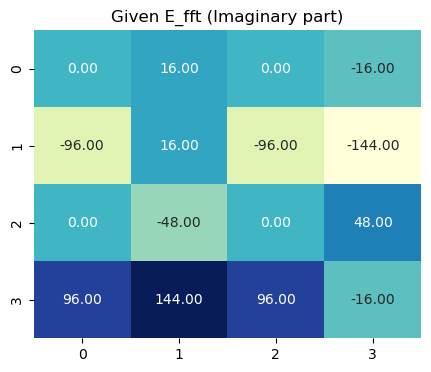

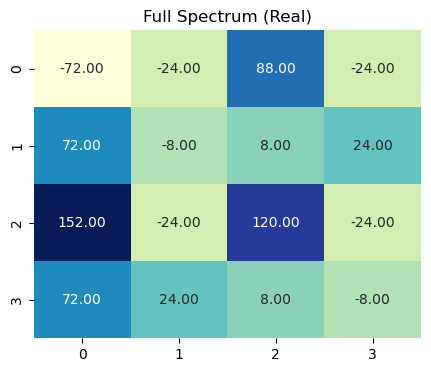

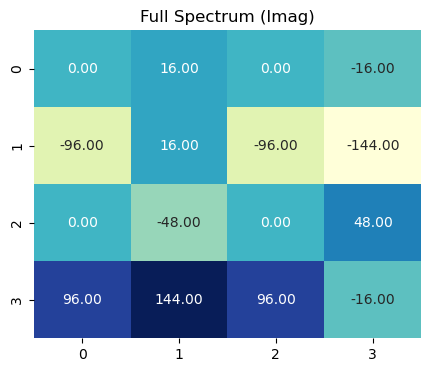



After column-wise IFFT (first element):
Real part: 56.00
Imag part: 0.00


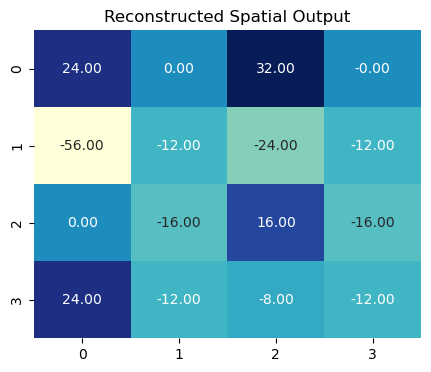

In [6]:
def show_matrix(mat, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(mat, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
    plt.title(title)
    plt.show()
    print()

# Our specific input and filter (4x4)
input_tile = np.array([
    [1, 2, 3, 4],
    [-1, -2, -3, -4],
    [1, -2, 3, -4],
    [0, 0, 0, -1]
], dtype=float)

filter_kernel = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
], dtype=float)

# Pad filter to match input size (4x4)
padded_filter = np.pad(filter_kernel, ((0,1), (0,1)), mode='constant')

show_matrix(input_tile, "Original Input Tile (4x4)")
show_matrix(padded_filter, "Padded Filter (4x4)")

"""
FORWARD TRANSFORMATION (2D FFT)
===============================
For our 4x4 case, we'll perform:
1. 1D FFT on each row (4-point FFT)
2. Then 1D FFT on each column of the row-transformed result

Because our input is real-valued, we get Hermitian symmetry in frequency domain:
For N=4 point FFT: X[k] = X*[N-k] (complex conjugate)
So we only need to compute first N//2 + 1 = 3 coefficients (k=0,1,2)
"""

def compute_1d_fft_along_rows(real_matrix):
    """Compute 1D FFT for each row of real-valued matrix"""
    num_rows, num_cols = real_matrix.shape
    # We only need half the coefficients + DC component (N//2 + 1)
    fft_real_part = np.zeros((num_rows, num_cols//2 + 1))
    fft_imag_part = np.zeros((num_rows, num_cols//2 + 1))
    
    # For our 4-point FFT (N=4), we compute k=0,1,2 (since k=3 will be conjugate of k=1)
    for frequency_index in range(num_cols//2 + 1):
        # Compute the complex exponential terms for this frequency
        angle = -2 * np.pi * frequency_index * np.arange(num_cols) / num_cols
        cosine_terms = np.cos(angle)
        sine_terms = np.sin(angle)
        
        # Dot product gives us the FT coefficients
        fft_real_part[:,frequency_index] = np.dot(real_matrix, cosine_terms)
        fft_imag_part[:,frequency_index] = np.dot(real_matrix, sine_terms)
        
        # Print computation for first row and first frequency (k=0)
        if frequency_index == 0:
            print("\nComputing DC component (k=0) for first row:")
            print(f"Row data: {real_matrix[0]}")
            print("Cosine terms (k=0): [1, 1, 1, 1]")
            print(f"Real part = sum(row * cos) = {np.sum(real_matrix[0] * 1)}")
            print("Sine terms (k=0): [0, 0, 0, 0]")
            print(f"Imag part = sum(row * sin) = {np.sum(real_matrix[0] * 0)}")
    
    return fft_real_part, fft_imag_part

# Compute row-wise FFT for input and filter
input_row_fft_real, input_row_fft_imag = compute_1d_fft_along_rows(input_tile)
filter_row_fft_real, filter_row_fft_imag = compute_1d_fft_along_rows(padded_filter)

show_matrix(input_row_fft_real, "Input Row FFT (Real part - first 3 coeffs)")
show_matrix(input_row_fft_imag, "Input Row FFT (Imaginary part - first 3 coeffs)")

show_matrix(filter_row_fft_real, "Filter Row FFT (Real part - first 3 coeffs)")
show_matrix(filter_row_fft_imag, "Filter Row FFT (Imaginary part - first 3 coeffs)")


"""
Now we do column-wise FFT on the row-transformed results.
For our 4x4 case with real input, the column FFT is complex-valued.
We need to compute full FFT since the intermediate result is complex.
"""

def compute_1d_fft_along_columns(row_fft_real, row_fft_imag):
    """Compute 1D FFT for each column of complex data"""
    num_rows, num_cols = row_fft_real.shape
    full_fft_real = np.zeros((num_rows, num_cols))
    full_fft_imag = np.zeros((num_rows, num_cols))
    
    # For each frequency component from row FFT
    for col in range(num_cols):
        # For each output frequency bin
        for row in range(num_rows):
            # Initialize sum
            sum_real = 0.0
            sum_imag = 0.0
            
            # Compute the complex exponential terms
            angle = -2 * np.pi * row * np.arange(num_rows) / num_rows
            cosine_terms = np.cos(angle)
            sine_terms = np.sin(angle)
            
            # Complex multiplication and accumulation
            for k in range(num_rows):
                # Real part: cos*real - sin*imag
                sum_real += cosine_terms[k] * row_fft_real[k,col] - sine_terms[k] * row_fft_imag[k,col]
                # Imag part: cos*imag + sin*real
                sum_imag += cosine_terms[k] * row_fft_imag[k,col] + sine_terms[k] * row_fft_real[k,col]
            
            full_fft_real[row,col] = sum_real
            full_fft_imag[row,col] = sum_imag
            
            # Print computation for first column's DC component
            if row == 0 and col == 0:
                print("\nComputing first column's DC component (l=0):")
                print(f"Column real parts: {row_fft_real[:,0]}")
                print(f"Column imag parts: {row_fft_imag[:,0]}")
                print("Cosine terms (l=0): [1, 1, 1, 1]")
                print("Sine terms (l=0): [0, 0, 0, 0]")
                print(f"Real part = sum(cos*real - sin*imag) = {sum_real}")
                print(f"Imag part = sum(cos*imag + sin*real) = {sum_imag}")
    
    return full_fft_real, full_fft_imag

# Compute column-wise FFT
input_fft_real, input_fft_imag = compute_1d_fft_along_columns(input_row_fft_real, input_row_fft_imag)
filter_fft_real, filter_fft_imag = compute_1d_fft_along_columns(filter_row_fft_real, filter_row_fft_imag)

show_matrix(input_fft_real, "Full Input FFT (Real part)")
show_matrix(input_fft_imag, "Full Input FFT (Imaginary part)")

show_matrix(filter_fft_real, "Full Filter FFT (Real part)")
show_matrix(filter_fft_imag, "Full Filter FFT (Imaginary part)")









"""
INVERSE TRANSFORMATION (2D IFFT)
================================
We'll use the given E_fft matrices for inverse transform.
For our 4x4 case, we need to:
1. Reconstruct full spectrum using Hermitian symmetry
2. Perform column-wise IFFT
3. Perform row-wise IFFT
"""

# Given frequency domain product (from your example)
E_fft_real = np.array([
    [-72., -24.,  88., -24.],
    [ 72.,  -8.,   8.,  24.],
    [152., -24., 120., -24.],
    [ 72.,  24.,   8.,  -8.]
])

E_fft_imag = np.array([
    [   0.,   16.,    0.,  -16.],
    [ -96.,   16.,  -96., -144.],
    [   0.,  -48.,    0.,   48.],
    [  96.,  144.,   96.,  -16.]
])

show_matrix(E_fft_real, "Given E_fft (Real part)")
show_matrix(E_fft_imag, "Given E_fft (Imaginary part)")

def reconstruct_full_spectrum(half_fft_real, half_fft_imag, original_shape):
    """Reconstruct full spectrum using Hermitian symmetry"""
    num_rows, num_cols = original_shape
    full_real = np.zeros(original_shape)
    full_imag = np.zeros(original_shape)
    
    # Copy the positive frequencies we have
    full_real[:, :num_cols//2 + 1] = half_fft_real
    full_imag[:, :num_cols//2 + 1] = half_fft_imag
    
    # Apply Hermitian symmetry for negative frequencies
    # For N=4, we need to fill indices 3 (which is -1 mod 4)
    # X[:,3] = X*[:,1] (complex conjugate)
    for k in range(1, num_cols//2 + 1):
        full_real[:, num_cols - k] = full_real[:, k]  # Real part is symmetric
        full_imag[:, num_cols - k] = -full_imag[:, k]  # Imag part is anti-symmetric
    
    print("\nReconstructing full spectrum using Hermitian symmetry:")
    print(f"For column 3 (k=-1), we take conjugate of column 1 (k=1):")
    print(f"Real[:,3] = Real[:,1] = {full_real[:,1]}")
    print(f"Imag[:,3] = -Imag[:,1] = {-full_imag[:,1]}")
    
    return full_real, full_imag

# For our 4x4 case, the given E_fft is actually the full spectrum
# So we don't need reconstruction (but normally we would)
full_spectrum_real = E_fft_real
full_spectrum_imag = E_fft_imag

show_matrix(full_spectrum_real, "Full Spectrum (Real)")
show_matrix(full_spectrum_imag, "Full Spectrum (Imag)")

def compute_2d_ifft(full_fft_real, full_fft_imag, original_shape):
    """Compute 2D IFFT for given full spectrum"""
    num_rows, num_cols = original_shape
    spatial_result = np.zeros(original_shape)
    
    # First do column-wise IFFT
    column_ifft = np.zeros(original_shape, dtype=complex)
    for col in range(num_cols):
        for row in range(num_rows):
            sum_real = 0.0
            sum_imag = 0.0
            
            # Compute complex exponential terms
            angle = 2 * np.pi * row * np.arange(num_rows) / num_rows
            cosine_terms = np.cos(angle)
            sine_terms = np.sin(angle)
            
            # Accumulate the sum
            for k in range(num_rows):
                # Real part: cos*real - (-sin)*imag = cos*real + sin*imag
                sum_real += cosine_terms[k] * full_fft_real[k,col] + sine_terms[k] * full_fft_imag[k,col]
                # Imag part: cos*imag - sin*real
                sum_imag += cosine_terms[k] * full_fft_imag[k,col] - sine_terms[k] * full_fft_real[k,col]
            
            column_ifft[row,col] = (sum_real + 1j*sum_imag) / num_rows
    
    print("\nAfter column-wise IFFT (first element):")
    print(f"Real part: {column_ifft[0,0].real:.2f}")
    print(f"Imag part: {column_ifft[0,0].imag:.2f}")
    
    # Then do row-wise IFFT (on real part only since output must be real)
    for row in range(num_rows):
        for col in range(num_cols):
            sum_val = 0.0
            
            # Compute only real part since imaginary should be zero
            angle = 2 * np.pi * col * np.arange(num_cols) / num_cols
            cosine_terms = np.cos(angle)
            
            for k in range(num_cols):
                sum_val += column_ifft[row,k].real * cosine_terms[k]
            
            spatial_result[row,col] = sum_val / num_cols
    
    return spatial_result

# Compute inverse transform
reconstructed_output = compute_2d_ifft(full_spectrum_real, full_spectrum_imag, (4,4))

show_matrix(reconstructed_output, "Reconstructed Spatial Output")

In [7]:

# MOST IMPORTANT UNDERSTANDING :-

# So n = 2 , m = 4
# We can precompute the FFT matrices for different n and m, since the additional overhead of implementing sines and cosines Look Up table 
# and the control circuitry to access them is not worth the pain of implementing a generalized FFT algorithm
# Now we can just directly use FFT matrices and MACs

def compute_fft_transformed(input_matrix, fft_real, fft_img):
    """
    Compute 2D FFT using precomputed matrices while leveraging Hermitian symmetry
    Returns only the unique components (9/16 for 4x4)
    """
    n, m = input_matrix.shape
    
    # =============================================
    # STEP 1: Row-wise FFT (real -> complex)
    # =============================================
    # For real inputs, we only need first m//2 + 1 columns
    row_fft_real = np.zeros((n, m//2 + 1))
    row_fft_img = np.zeros((n, m//2 + 1))
    
    # Compute only the unique frequency components
    for k in range(m//2 + 1):  # For 4-point: k=0,1,2
        # Real part = sum(input * fft_real[k])
        row_fft_real[:, k] = np.dot(input_matrix, fft_real[k, :])
        # Imag part = sum(input * fft_img[k])
        row_fft_img[:, k] = np.dot(input_matrix, fft_img[k, :])
    
    print("\nAfter Row-wise FFT (only computing k=0,1,2):")
    print("Row FFT Real:", row_fft_real)
    print("Row FFT Imag:", row_fft_img)
    
    # =============================================
    # STEP 2: Column-wise FFT (complex -> complex)
    # =============================================
    # Initialize output (we'll only compute 9 unique components)
    transformed_real = np.zeros((n, m//2 + 1))
    transformed_img = np.zeros((n, m//2 + 1))
    
    # For each frequency component from row FFT
    for k in range(m//2 + 1):  # Columns: 0,1,2
        for l in range(n):     # Rows: 0,1,2,3
            # Complex multiply and accumulate
            real_part = 0.0
            imag_part = 0.0
            
            for i in range(n):
                # Real part of FFT: cos*real - sin*imag
                real_part += fft_real[l,i] * row_fft_real[i,k] - fft_img[l,i] * row_fft_img[i,k]
                # Imag part of FFT: cos*imag + sin*real
                imag_part += fft_real[l,i] * row_fft_img[i,k] + fft_img[l,i] * row_fft_real[i,k]
            
            transformed_real[l,k] = real_part
            transformed_img[l,k] = imag_part
    
    print("\nAfter Column-wise FFT (only computing 9 unique components):")
    print("Transformed Real:", transformed_real)
    print("Transformed Imag:", transformed_img)
    
    return transformed_real, transformed_img

def reconstruct_full_spectrum(partial_real, partial_img):
    """
    Reconstruct full 4x4 spectrum using Hermitian symmetry
    X[i,j] = X*[ (-i mod 4), (-j mod 4) ]
    """
    n = partial_real.shape[0]  # 4 rows
    m = 4  # We know we're working with 4-point FFT
    
    full_real = np.zeros((n, m))
    full_img = np.zeros((n, m))
    
    # Copy the computed components (columns 0,1,2)
    full_real[:, :m//2 + 1] = partial_real
    full_img[:, :m//2 + 1] = partial_img
    
    # Apply Hermitian symmetry for column 3 (k=-1)
    full_real[:, 3] = full_real[:, 1]   # Real part is symmetric
    full_img[:, 3] = -full_img[:, 1]    # Imag part is anti-symmetric
    
    # For row symmetry (since input is real)
    # Row 3 is conjugate of row 1, row 2 is real
    full_real[3, :] = full_real[1, :]
    full_img[3, :] = -full_img[1, :]
    
    # The Nyquist frequency (row 2, column 2) should be real
    full_img[2, 2] = 0
    
    return full_real, full_img



fft_real = np.array([
    [1,  1, 1,   1],
    [1,  0, -1,  0],
    [1,  -1, 1,  -1],
    [1,  0, -1,  0],
])

fft_img = np.array([
    [0,  0, 0,   0],
    [0,  -1, 0,  1],
    [0,  0, 0,  0],
    [0,  1, 0,  -1],
])


input_tile = np.array([
    [1, 2, 3, 4],
    [-1, -2, -3, -4],
    [1, -2, 3, -4],
    [0, 0, 0, -1]
], dtype=float)

filter_kernel = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
], dtype=float)


# Pad filter to match input size (4x4)
padded_filter = np.pad(filter_kernel, ((0,1), (0,1)), mode='constant')

# Compute FFT for rows and columns (only computing 9 unique components)
input_transformed_real, input_transformed_img = compute_fft_transformed(input_tile, fft_real, fft_img)
filter_transformed_real, filter_transformed_img = compute_fft_transformed(padded_filter, fft_real, fft_img)

# Reconstruct full spectrum using Hermitian symmetry
input_full_real, input_full_img = reconstruct_full_spectrum(input_transformed_real, input_transformed_img)
filter_full_real, filter_full_img = reconstruct_full_spectrum(filter_transformed_real, filter_transformed_img)

print("\n=== Final Reconstructed Spectra ===")
print("Input Full Real:\n", input_full_real)
print("Input Full Imag:\n", input_full_img)
print("\nFilter Full Real:\n", filter_full_real)
print("Filter Full Imag:\n", filter_full_img)


After Row-wise FFT (only computing k=0,1,2):
Row FFT Real: [[ 10.  -2.  -2.]
 [-10.   2.   2.]
 [ -2.  -2.  10.]
 [ -1.   0.   1.]]
Row FFT Imag: [[ 0.  2.  0.]
 [ 0. -2.  0.]
 [ 0. -2.  0.]
 [ 0. -1.  0.]]

After Column-wise FFT (only computing 9 unique components):
Transformed Real: [[ -3.  -2.  11.]
 [ 12.  -1. -12.]
 [ 19.  -6.   5.]
 [ 12.   1. -12.]]
Transformed Imag: [[ 0. -3.  0.]
 [ 9.  2. -1.]
 [ 0.  3.  0.]
 [-9.  6.  1.]]

After Row-wise FFT (only computing k=0,1,2):
Row FFT Real: [[ 2.  2.  2.]
 [ 2.  0. -2.]
 [ 2. -2.  2.]
 [ 0.  0.  0.]]
Row FFT Imag: [[ 0.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

After Column-wise FFT (only computing 9 unique components):
Transformed Real: [[6. 0. 2.]
 [0. 2. 0.]
 [2. 0. 6.]
 [0. 6. 0.]]
Transformed Imag: [[ 0. -2.  0.]
 [-2.  0.  2.]
 [ 0.  2.  0.]
 [ 2.  0. -2.]]

=== Final Reconstructed Spectra ===
Input Full Real:
 [[ -3.  -2.  11.  -2.]
 [ 12.  -1. -12.  -1.]
 [ 19.  -6.   5.  -6.]
 [ 12.  -1. -12.  -1.]]
Input Full